In [ ]:
!unzip /content/drive/MyDrive/archive.zip

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import numpy as np #Numerical computations on arrays and matrices
import pandas as pd # Data Manipulation and analysis converting to excel sheets
import matplotlib.pyplot as plt #ploting graphs
import cv2 #open cv library
import tensorflow as tf #Libraries for machine learning and Deep learing
from PIL import Image #python image library 
import os                                              #operating system
os.chdir('/content/Train')                             # change directory
from sklearn.model_selection import train_test_split   #Hyperparameters train and test 
from keras.utils import to_categorical                 #Converts a class vector (integers) to binary class matrix 
                                       # E.g. for use with categorical_crossentropy.
from keras.models import Sequential, load_model #Sequential provides training and inference features on this model.
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout 
from google.colab.patches import cv2_imshow #To show the image.


In [ ]:
data = [] #list in python
labels = [] #list in python
classes = 43 # We have 43 Classes
cur_path = os.getcwd() #absolute path of current working directory

In [ ]:
cur_path

'/content/Train'

In [ ]:
 
for i in range(classes): #iterates from 0 to 42 classes
    path = os.path.join(cur_path,str(i)) #Join two or more pathname components
    images = os.listdir(path) #Return a list containing the names of the files .
    for a in images:
        try:
            image = Image.open(path + '/'+ a) #opens and identifies the given image file.
            image = image.resize((30,30)) #resizing the image
            image = np.array(image) #converting to np array
            data.append(image) #Append object to the end of the list.
            labels.append(i) #Appending labels
        except Exception as e:
            print(e) #print if there are any exceptions

In [ ]:
data = np.array(data) #nd array with shape (32,32,3)
labels = np.array(labels) # array of labels

In [ ]:
np.save('/content/training/data',data) #saving of data i.e classes
np.save('/content/training/target',labels) # saving of labels 
print('Data and labels are saved in drive for future access')

Data and labels are saved in drive for future access


In [ ]:
data=np.load('/content/training/data.npy') #loading of data
labels=np.load('/content/training/target.npy') #loading of labels
print('Loading the images and labels')

Loading the images and labels


In [ ]:
print(data.shape, labels.shape)
#Total number of images and labels 

(39209, 30, 30, 3) (39209,)


In [ ]:
#dataset split into train and test
#x_train=Images y_train=labels 
#x_test=images y_test=labels
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
y_train = to_categorical(y_train, 43) #Converts a class vector (images) to binary class matrix.
#print(y_train)
y_test = to_categorical(y_test, 43) #Converts a class vector (labels) to binary class matrix.
#print(y_test)


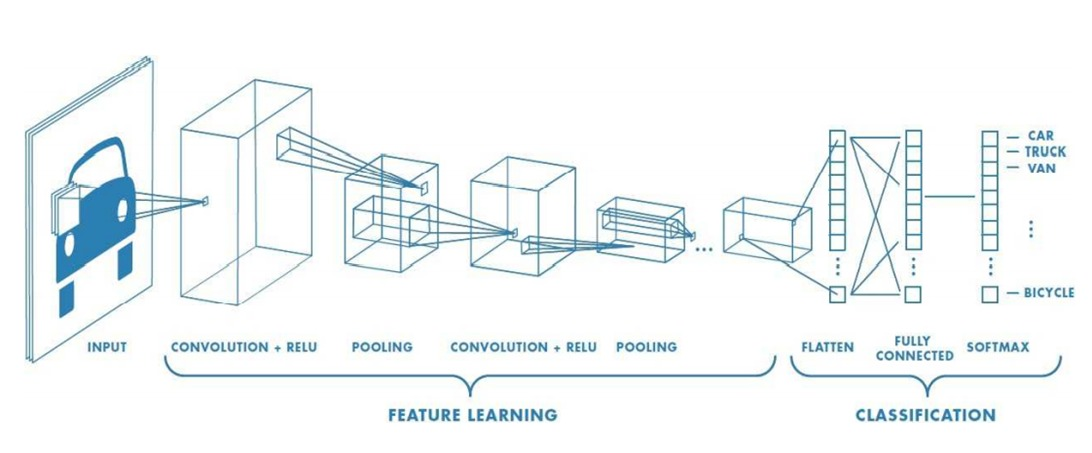

In [ ]:
src = cv2.imread("/content/deep_learning.jpeg")
cv2_imshow(src)

In [ ]:
src = cv2.imread("/content/convolution.jpeg")
cv2_imshow(src)

In [ ]:
src = cv2.imread("/content/relu.jpeg")
cv2_imshow(src)

In [ ]:
model = Sequential() #Groups a linear stack of layers into a tf.keras.Model
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) #spatial convolution over images
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) #spatial convolution over images
model.add(MaxPool2D(pool_size=(2, 2))) #Downsamples the input representation by taking the maximum value
model.add(Dropout(rate=0.25)) #To prevent overfitting.
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten()) #converting  matrix into column matrix
model.add(Dense(256, activation='relu')) #output = activation(dot(input, kernel) + bias)
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax')) #We have 43 classes so 43 in the dense


In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
epochs = 20 #iterations on a dataset
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 39s 9ms/step - loss: 3.3950 - accuracy: 0.3008 - val_loss: 0.8176 - val_accuracy: 0.7725
Epoch 2/20
981/981 [==============================] - 8s 8ms/step - loss: 1.0733 - accuracy: 0.6841 - val_loss: 0.3731 - val_accuracy: 0.8949
Epoch 3/20
981/981 [==============================] - 8s 8ms/step - loss: 0.6258 - accuracy: 0.8147 - val_loss: 0.2324 - val_accuracy: 0.9314
Epoch 4/20
981/981 [==============================] - 8s 8ms/step - loss: 0.4498 - accuracy: 0.8641 - val_loss: 0.1470 - val_accuracy: 0.9577
Epoch 5/20
981/981 [==============================] - 8s 8ms/step - loss: 0.3679 - accuracy: 0.8911 - val_loss: 0.1364 - val_accuracy: 0.9583
Epoch 6/20
981/981 [==============================] - 8s 8ms/step - loss: 0.3153 - accuracy: 0.9064 - val_loss: 0.1801 - val_accuracy: 0.9431
Epoch 7/20
981/981 [==============================] - 8s 8ms/step - loss: 0.2884 - accuracy: 0.9136 - val_loss: 0.1183 - val_accuracy: 0.9626
Epoch

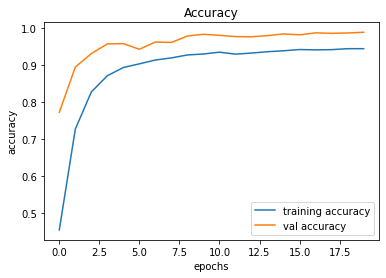

In [ ]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

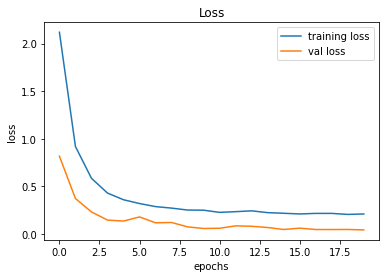

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#testing of images
def testing(testcsv):
    y_test = pd.read_csv(testcsv)    #read test image 
    label = y_test["ClassId"].values #
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_test, label = testing('Test.csv')  #X_test=images

In [ ]:
Y_pred = model.predict_classes(X_test)  #model prediction 
Y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([16,  1, 38, ..., 32,  7, 10])

In [ ]:
from sklearn.metrics import accuracy_score #Accuracy_score 
print(accuracy_score(label, Y_pred)) 

0.9536817102137767


In [ ]:
model.save("/content/training/TSR.h5")

In [ ]:
import os
os.chdir(r'/content/Train')
from keras.models import load_model
model = load_model('/content/training/TSR.h5')

In [ ]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [ ]:
from PIL import Image #import images from library
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predicted traffic sign is:  Speed limit (70km/h)


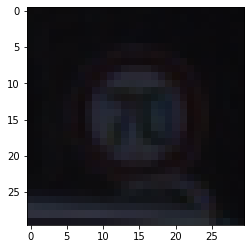

In [ ]:
plot,prediction = test_on_img(r'/content/Test/05344.png') #plot test image 
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a]) #image classified into one of 0-42 classes
plt.imshow(plot) #plot image
plt.show()